In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('Customer Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# In EDA first step is ENSPECTION OF DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype('float')

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['customerID'].duplicated().sum()

np.int64(0)

In [15]:
def conv(val):
    if val==1:
        return 'yes'
    else:
        return 'no'
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)


In [ ]:
# Converted 0 n 1 values of senior citizen to yes/no to make it easier to understand

In [ ]:
# Analysis of customer

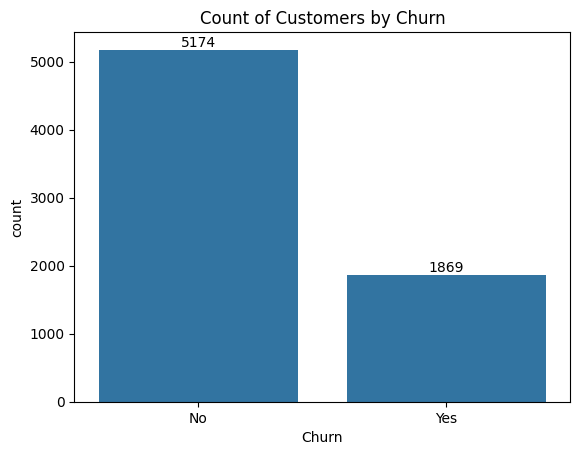

In [25]:
ax= sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

In [ ]:
# df['Churn'].value_counts()

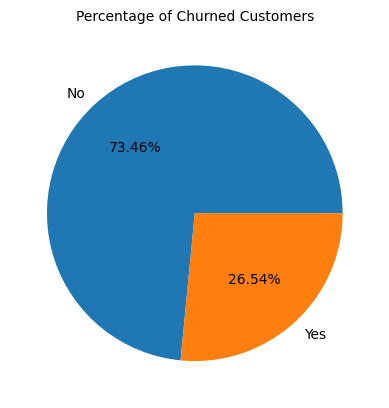

In [28]:
plt.Figure(figsize=(3,4))
gb= df.groupby('Churn').agg({'Churn':'count'})
gb
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.title('Percentage of Churned Customers',fontsize=10)
plt.show()

In [ ]:
# From given pie chart we can conclude that 26.54% of our customers have churned out
# Now explore the reason behind that

Churn
No     5174
Yes    1869
Name: count, dtype: int64

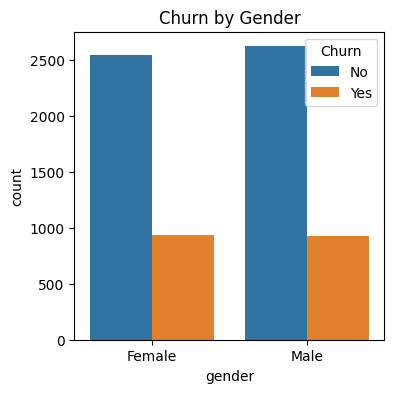

In [34]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender',data=df,hue='Churn')
plt.title('Churn by Gender')
plt.show()

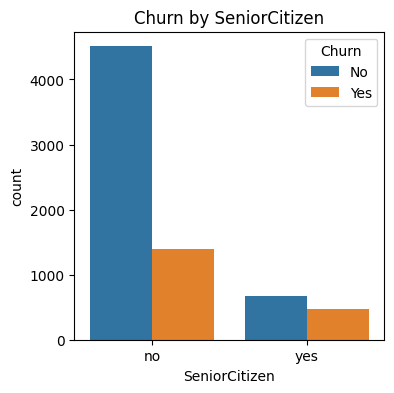

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.title('Churn by SeniorCitizen')
plt.show()

In [36]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64

In [ ]:
# Comparatively a greated % of people in senior citizen category have churned 

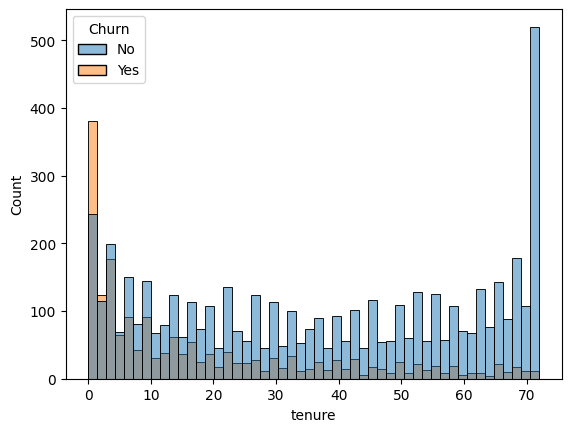

In [39]:
plt.Figure(figsize=(9,6))
sns.histplot(x='tenure',data=df,bins=50,hue='Churn')
plt.show()

In [ ]:
# people who have used services for a long time have stayed n people who have usednare services gor 1 n 2 months have churned

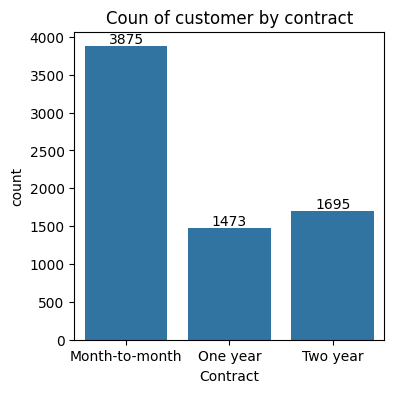

In [ ]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of customer by contract')
plt.show()

In [ ]:
# people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [41]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

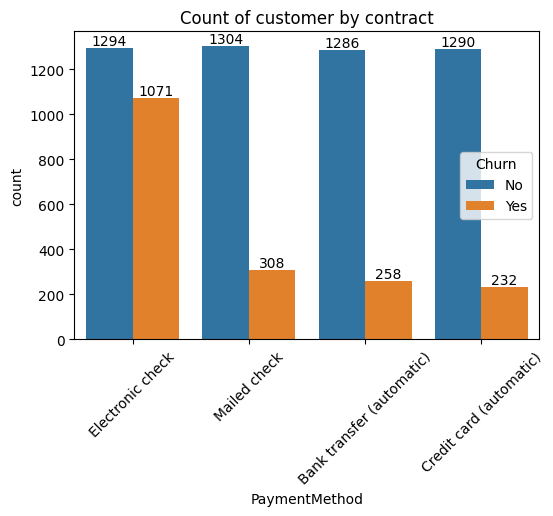

In [42]:
plt.figure(figsize=(6,4))
ax= sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of customer by contract')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Customer is likely to churn when they using Electronic check as Payement Method